In [314]:
import pandas as pd
import os
import datetime
import requests
from datetime import datetime
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/casti/Downloads/graphviz-2.38/release/bin'
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline
import pprint
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [315]:
resultStart = pd.read_csv('resultStartStation31258.csv')

In [316]:
resultEnd = pd.read_csv('resultEndStation31258.csv')

In [ ]:
resultStart

In [5]:
resultStart2=resultStart.groupby(["datetimelocal"]).size().to_frame('count').reset_index()
resultStart3=resultStart.groupby(["datetimelocal"])
resultStart3=resultStart3.agg({'atemperatue':'mean','humidity':'mean','temperature':'mean', 'windSpeed':'mean', 'hour_local':'mean'})
resultStart3=resultStart3.reset_index()
resultStart4=resultStart3.merge(resultStart2, on='datetimelocal')
resultStart4.rename(columns = {'atemperatue':'atemperature', 'count':'count_start'}, inplace = True)

In [6]:
resultStart4.head(10)

datetimelocal  atemperature  humidity  temperature  windSpeed  \
0  2017-01-01 00:00:00          5.62      0.40         7.32       9.12   
1  2017-01-01 08:00:00          3.42      0.62         3.42       0.70   
2  2017-01-01 10:00:00          7.36      0.53         7.36       1.05   
3  2017-01-01 11:00:00          9.20      0.50         9.20       2.72   
4  2017-01-01 12:00:00         10.78      0.47        10.78       6.02   
5  2017-01-01 13:00:00         11.51      0.45        11.51       4.10   
6  2017-01-01 14:00:00         11.78      0.45        11.78       3.10   
7  2017-01-01 15:00:00         11.84      0.45        11.84       2.95   
8  2017-01-01 16:00:00         11.60      0.46        11.60       1.84   
9  2017-01-01 17:00:00          9.97      0.51         9.97       0.56   

   hour_local  count_start  
0         0.0          120  
1         8.0           48  
2        10.0           56  
3        11.0          182  
4        12.0           12  
5        13.0          165  
6        14.0          190  
7        15.0          207  
8        16.0          184  
9        17.0           70

In [7]:
resultEnd2=resultEnd.groupby(["datetimelocal"]).size().to_frame('count').reset_index()
resultEnd3=resultEnd.groupby(["datetimelocal"])
resultEnd3=resultEnd3.agg({'atemperatue':'mean','humidity':'mean','temperature':'mean', 'windSpeed':'mean', 'hour_local':'mean'})
resultEnd3=resultEnd3.reset_index()
resultEnd4=resultEnd3.merge(resultEnd2, on='datetimelocal')
resultEnd4.rename(columns = {'atemperatue':'atemperature', 'count':'count_end'}, inplace = True)

In [8]:
resultEnd4.head(10)

datetimelocal  atemperature  humidity  temperature  windSpeed  \
0  2017-01-01 07:00:00          3.53      0.60         3.53       0.61   
1  2017-01-01 08:00:00          3.42      0.62         3.42       0.70   
2  2017-01-01 09:00:00          4.83      0.61         4.83       0.67   
3  2017-01-01 10:00:00          7.36      0.53         7.36       1.05   
4  2017-01-01 11:00:00          9.20      0.50         9.20       2.72   
5  2017-01-01 12:00:00         10.78      0.47        10.78       6.02   
6  2017-01-01 13:00:00         11.51      0.45        11.51       4.10   
7  2017-01-01 14:00:00         11.78      0.45        11.78       3.10   
8  2017-01-01 15:00:00         11.84      0.45        11.84       2.95   
9  2017-01-01 16:00:00         11.60      0.46        11.60       1.84   

   hour_local  count_end  
0         7.0         34  
1         8.0         16  
2         9.0         15  
3        10.0         84  
4        11.0         26  
5        12.0        180  
6        13.0        143  
7        14.0        250  
8        15.0        288  
9        16.0         56

In [9]:
result4 = resultStart4.append([resultEnd4], sort=True)
#result4=resultStart4.merge(resultEnd4, on=['datetimelocal', 'atemperature', 'humidity', 'windSpeed']) #on='datetimelocal'

In [10]:
result4.sort_values('datetimelocal')

atemperature  count_end  count_start        datetimelocal  hour_local  \
0             5.62        NaN        120.0  2017-01-01 00:00:00         0.0   
0             3.53       34.0          NaN  2017-01-01 07:00:00         7.0   
1             3.42       16.0          NaN  2017-01-01 08:00:00         8.0   
1             3.42        NaN         48.0  2017-01-01 08:00:00         8.0   
2             4.83       15.0          NaN  2017-01-01 09:00:00         9.0   
...            ...        ...          ...                  ...         ...   
5891        -11.12       26.0          NaN  2017-12-31 11:00:00        11.0   
5892        -10.60        9.0          NaN  2017-12-31 15:00:00        15.0   
5893        -11.31        8.0          NaN  2017-12-31 16:00:00        16.0   
5792        -10.24        NaN          7.0  2017-12-31 17:00:00        17.0   
5894        -10.24       21.0          NaN  2017-12-31 17:00:00        17.0   

      humidity  temperature  windSpeed  
0         0.40         7.32       9.12  
0         0.60         3.53       0.61  
1         0.62         3.42       0.70  
1         0.62         3.42       0.70  
2         0.61         4.83       0.67  
...        ...          ...        ...  
5891      0.44        -7.01       8.45  
5892      0.47        -6.59       8.39  
5893      0.54        -7.08       8.71  
5792      0.55        -7.33       5.61  
5894      0.55        -7.33       5.61  

[11688 rows x 8 columns]

In [11]:
result4.set_index('datetimelocal')

atemperature  count_end  count_start  hour_local  \
datetimelocal                                                           
2017-01-01 00:00:00          5.62        NaN        120.0         0.0   
2017-01-01 08:00:00          3.42        NaN         48.0         8.0   
2017-01-01 10:00:00          7.36        NaN         56.0        10.0   
2017-01-01 11:00:00          9.20        NaN        182.0        11.0   
2017-01-01 12:00:00         10.78        NaN         12.0        12.0   
...                           ...        ...          ...         ...   
2017-12-31 10:00:00        -12.10       14.0          NaN        10.0   
2017-12-31 11:00:00        -11.12       26.0          NaN        11.0   
2017-12-31 15:00:00        -10.60        9.0          NaN        15.0   
2017-12-31 16:00:00        -11.31        8.0          NaN        16.0   
2017-12-31 17:00:00        -10.24       21.0          NaN        17.0   

                     humidity  temperature  windSpeed  
datetimelocal                                          
2017-01-01 00:00:00      0.40         7.32       9.12  
2017-01-01 08:00:00      0.62         3.42       0.70  
2017-01-01 10:00:00      0.53         7.36       1.05  
2017-01-01 11:00:00      0.50         9.20       2.72  
2017-01-01 12:00:00      0.47        10.78       6.02  
...                       ...          ...        ...  
2017-12-31 10:00:00      0.48        -7.46       9.69  
2017-12-31 11:00:00      0.44        -7.01       8.45  
2017-12-31 15:00:00      0.47        -6.59       8.39  
2017-12-31 16:00:00      0.54        -7.08       8.71  
2017-12-31 17:00:00      0.55        -7.33       5.61  

[11688 rows x 7 columns]

In [12]:
result4['count_end'] = result4['count_end'].fillna(0)

In [13]:
result4['count_start'] = result4['count_start'].fillna(0)

In [14]:
result4

atemperature  count_end  count_start        datetimelocal  hour_local  \
0             5.62        0.0        120.0  2017-01-01 00:00:00         0.0   
1             3.42        0.0         48.0  2017-01-01 08:00:00         8.0   
2             7.36        0.0         56.0  2017-01-01 10:00:00        10.0   
3             9.20        0.0        182.0  2017-01-01 11:00:00        11.0   
4            10.78        0.0         12.0  2017-01-01 12:00:00        12.0   
...            ...        ...          ...                  ...         ...   
5890        -12.10       14.0          0.0  2017-12-31 10:00:00        10.0   
5891        -11.12       26.0          0.0  2017-12-31 11:00:00        11.0   
5892        -10.60        9.0          0.0  2017-12-31 15:00:00        15.0   
5893        -11.31        8.0          0.0  2017-12-31 16:00:00        16.0   
5894        -10.24       21.0          0.0  2017-12-31 17:00:00        17.0   

      humidity  temperature  windSpeed  
0         0.40         7.32       9.12  
1         0.62         3.42       0.70  
2         0.53         7.36       1.05  
3         0.50         9.20       2.72  
4         0.47        10.78       6.02  
...        ...          ...        ...  
5890      0.48        -7.46       9.69  
5891      0.44        -7.01       8.45  
5892      0.47        -6.59       8.39  
5893      0.54        -7.08       8.71  
5894      0.55        -7.33       5.61  

[11688 rows x 8 columns]

In [15]:
result4['count_end_minus_start']=result4['count_end']-result4['count_start']

In [16]:
result4

atemperature  count_end  count_start        datetimelocal  hour_local  \
0             5.62        0.0        120.0  2017-01-01 00:00:00         0.0   
1             3.42        0.0         48.0  2017-01-01 08:00:00         8.0   
2             7.36        0.0         56.0  2017-01-01 10:00:00        10.0   
3             9.20        0.0        182.0  2017-01-01 11:00:00        11.0   
4            10.78        0.0         12.0  2017-01-01 12:00:00        12.0   
...            ...        ...          ...                  ...         ...   
5890        -12.10       14.0          0.0  2017-12-31 10:00:00        10.0   
5891        -11.12       26.0          0.0  2017-12-31 11:00:00        11.0   
5892        -10.60        9.0          0.0  2017-12-31 15:00:00        15.0   
5893        -11.31        8.0          0.0  2017-12-31 16:00:00        16.0   
5894        -10.24       21.0          0.0  2017-12-31 17:00:00        17.0   

      humidity  temperature  windSpeed  count_end_minus_start  
0         0.40         7.32       9.12                 -120.0  
1         0.62         3.42       0.70                  -48.0  
2         0.53         7.36       1.05                  -56.0  
3         0.50         9.20       2.72                 -182.0  
4         0.47        10.78       6.02                  -12.0  
...        ...          ...        ...                    ...  
5890      0.48        -7.46       9.69                   14.0  
5891      0.44        -7.01       8.45                   26.0  
5892      0.47        -6.59       8.39                    9.0  
5893      0.54        -7.08       8.71                    8.0  
5894      0.55        -7.33       5.61                   21.0  

[11688 rows x 9 columns]

In [17]:
result4.set_index('datetimelocal')

atemperature  count_end  count_start  hour_local  \
datetimelocal                                                           
2017-01-01 00:00:00          5.62        0.0        120.0         0.0   
2017-01-01 08:00:00          3.42        0.0         48.0         8.0   
2017-01-01 10:00:00          7.36        0.0         56.0        10.0   
2017-01-01 11:00:00          9.20        0.0        182.0        11.0   
2017-01-01 12:00:00         10.78        0.0         12.0        12.0   
...                           ...        ...          ...         ...   
2017-12-31 10:00:00        -12.10       14.0          0.0        10.0   
2017-12-31 11:00:00        -11.12       26.0          0.0        11.0   
2017-12-31 15:00:00        -10.60        9.0          0.0        15.0   
2017-12-31 16:00:00        -11.31        8.0          0.0        16.0   
2017-12-31 17:00:00        -10.24       21.0          0.0        17.0   

                     humidity  temperature  windSpeed  count_end_minus_start  
datetimelocal                                                                 
2017-01-01 00:00:00      0.40         7.32       9.12                 -120.0  
2017-01-01 08:00:00      0.62         3.42       0.70                  -48.0  
2017-01-01 10:00:00      0.53         7.36       1.05                  -56.0  
2017-01-01 11:00:00      0.50         9.20       2.72                 -182.0  
2017-01-01 12:00:00      0.47        10.78       6.02                  -12.0  
...                       ...          ...        ...                    ...  
2017-12-31 10:00:00      0.48        -7.46       9.69                   14.0  
2017-12-31 11:00:00      0.44        -7.01       8.45                   26.0  
2017-12-31 15:00:00      0.47        -6.59       8.39                    9.0  
2017-12-31 16:00:00      0.54        -7.08       8.71                    8.0  
2017-12-31 17:00:00      0.55        -7.33       5.61                   21.0  

[11688 rows x 8 columns]

In [18]:
result4.head(20)

atemperature  count_end  count_start        datetimelocal  hour_local  \
0           5.62        0.0        120.0  2017-01-01 00:00:00         0.0   
1           3.42        0.0         48.0  2017-01-01 08:00:00         8.0   
2           7.36        0.0         56.0  2017-01-01 10:00:00        10.0   
3           9.20        0.0        182.0  2017-01-01 11:00:00        11.0   
4          10.78        0.0         12.0  2017-01-01 12:00:00        12.0   
5          11.51        0.0        165.0  2017-01-01 13:00:00        13.0   
6          11.78        0.0        190.0  2017-01-01 14:00:00        14.0   
7          11.84        0.0        207.0  2017-01-01 15:00:00        15.0   
8          11.60        0.0        184.0  2017-01-01 16:00:00        16.0   
9           9.97        0.0         70.0  2017-01-01 17:00:00        17.0   
10          8.05        0.0         18.0  2017-01-01 18:00:00        18.0   
11          6.85        0.0         10.0  2017-01-01 19:00:00        19.0   
12          7.08        0.0         69.0  2017-01-02 01:00:00         1.0   
13          4.86        0.0         16.0  2017-01-02 08:00:00         8.0   
14          6.35        0.0         36.0  2017-01-02 12:00:00        12.0   
15          5.65        0.0         11.0  2017-01-02 13:00:00        13.0   
16          6.37        0.0          9.0  2017-01-02 15:00:00        15.0   
17          6.36        0.0         14.0  2017-01-02 17:00:00        17.0   
18          6.48        0.0         48.0  2017-01-03 12:00:00        12.0   
19          7.04        0.0         20.0  2017-01-03 14:00:00        14.0   

    humidity  temperature  windSpeed  count_end_minus_start  
0       0.40         7.32       9.12                 -120.0  
1       0.62         3.42       0.70                  -48.0  
2       0.53         7.36       1.05                  -56.0  
3       0.50         9.20       2.72                 -182.0  
4       0.47        10.78       6.02                  -12.0  
5       0.45        11.51       4.10                 -165.0  
6       0.45        11.78       3.10                 -190.0  
7       0.45        11.84       2.95                 -207.0  
8       0.46        11.60       1.84                 -184.0  
9       0.51         9.97       0.56                  -70.0  
10      0.57         8.05       0.64                  -18.0  
11      0.60         6.85       1.37                  -10.0  
12      0.63         7.08       2.01                  -69.0  
13      0.91         4.86       3.76                  -16.0  
14      0.91         6.35       4.12                  -36.0  
15      0.91         6.37       5.00                  -11.0  
16      0.91         6.37       3.93                   -9.0  
17      0.91         6.36       4.79                  -14.0  
18      0.92         6.48       1.98                  -48.0  
19      0.91         7.04       1.10                  -20.0

In [19]:
result4['defizit']=result4['count_end_minus_start']

In [20]:
result5=result4

In [21]:
defizit_norm = result5[['defizit']]
defizit_norm.rename(columns = {'defizit':'defizit_norm'}, inplace = True)
defizit_norm[defizit_norm < 5] = 1
defizit_norm[defizit_norm >= 5] = 0
defizit_norm
#result5[['defizit'] < 5] = 0

#result5['defizit'].replace(<5, 0, inplace=True)
#df['menopause'].replace('ge40', 1, inplace=True)

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

defizit_norm
0              1.0
1              1.0
2              1.0
3              1.0
4              1.0
...            ...
5890           0.0
5891           0.0
5892           0.0
5893           0.0
5894           0.0

[11688 rows x 1 columns]

In [22]:
result6 = pd.concat([result5, defizit_norm], axis=1, join_axes=[result5.index])
#result6 = result5.merge(defizit_norm, on='index') #sort=True

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


In [23]:
result6

atemperature  count_end  count_start        datetimelocal  hour_local  \
0             5.62        0.0        120.0  2017-01-01 00:00:00         0.0   
1             3.42        0.0         48.0  2017-01-01 08:00:00         8.0   
2             7.36        0.0         56.0  2017-01-01 10:00:00        10.0   
3             9.20        0.0        182.0  2017-01-01 11:00:00        11.0   
4            10.78        0.0         12.0  2017-01-01 12:00:00        12.0   
...            ...        ...          ...                  ...         ...   
5890        -12.10       14.0          0.0  2017-12-31 10:00:00        10.0   
5891        -11.12       26.0          0.0  2017-12-31 11:00:00        11.0   
5892        -10.60        9.0          0.0  2017-12-31 15:00:00        15.0   
5893        -11.31        8.0          0.0  2017-12-31 16:00:00        16.0   
5894        -10.24       21.0          0.0  2017-12-31 17:00:00        17.0   

      humidity  temperature  windSpeed  count_end_minus_start  defizit  \
0         0.40         7.32       9.12                 -120.0   -120.0   
1         0.62         3.42       0.70                  -48.0    -48.0   
2         0.53         7.36       1.05                  -56.0    -56.0   
3         0.50         9.20       2.72                 -182.0   -182.0   
4         0.47        10.78       6.02                  -12.0    -12.0   
...        ...          ...        ...                    ...      ...   
5890      0.48        -7.46       9.69                   14.0     14.0   
5891      0.44        -7.01       8.45                   26.0     26.0   
5892      0.47        -6.59       8.39                    9.0      9.0   
5893      0.54        -7.08       8.71                    8.0      8.0   
5894      0.55        -7.33       5.61                   21.0     21.0   

      defizit_norm  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
...            ...  
5890           0.0  
5891           0.0  
5892           0.0  
5893           0.0  
5894           0.0  

[11688 rows x 11 columns]

In [24]:
result7=result6

In [25]:
result7['defizit_norm'] = np.where(result7['defizit_norm'] == 0, result7['count_start'], result7['defizit_norm'])
#df['col1'] = np.where(df['col1'] == 0, df['col2'], df['col1'])
#if result7.item('count_end')==0 and result7.item('count_start')==0:
    #result7.item('defizit_norm')==1

In [26]:
result7

atemperature  count_end  count_start        datetimelocal  hour_local  \
0             5.62        0.0        120.0  2017-01-01 00:00:00         0.0   
1             3.42        0.0         48.0  2017-01-01 08:00:00         8.0   
2             7.36        0.0         56.0  2017-01-01 10:00:00        10.0   
3             9.20        0.0        182.0  2017-01-01 11:00:00        11.0   
4            10.78        0.0         12.0  2017-01-01 12:00:00        12.0   
...            ...        ...          ...                  ...         ...   
5890        -12.10       14.0          0.0  2017-12-31 10:00:00        10.0   
5891        -11.12       26.0          0.0  2017-12-31 11:00:00        11.0   
5892        -10.60        9.0          0.0  2017-12-31 15:00:00        15.0   
5893        -11.31        8.0          0.0  2017-12-31 16:00:00        16.0   
5894        -10.24       21.0          0.0  2017-12-31 17:00:00        17.0   

      humidity  temperature  windSpeed  count_end_minus_start  defizit  \
0         0.40         7.32       9.12                 -120.0   -120.0   
1         0.62         3.42       0.70                  -48.0    -48.0   
2         0.53         7.36       1.05                  -56.0    -56.0   
3         0.50         9.20       2.72                 -182.0   -182.0   
4         0.47        10.78       6.02                  -12.0    -12.0   
...        ...          ...        ...                    ...      ...   
5890      0.48        -7.46       9.69                   14.0     14.0   
5891      0.44        -7.01       8.45                   26.0     26.0   
5892      0.47        -6.59       8.39                    9.0      9.0   
5893      0.54        -7.08       8.71                    8.0      8.0   
5894      0.55        -7.33       5.61                   21.0     21.0   

      defizit_norm  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
...            ...  
5890           0.0  
5891           0.0  
5892           0.0  
5893           0.0  
5894           0.0  

[11688 rows x 11 columns]

In [27]:
result7.head(100)

atemperature  count_end  count_start        datetimelocal  hour_local  \
0           5.62        0.0        120.0  2017-01-01 00:00:00         0.0   
1           3.42        0.0         48.0  2017-01-01 08:00:00         8.0   
2           7.36        0.0         56.0  2017-01-01 10:00:00        10.0   
3           9.20        0.0        182.0  2017-01-01 11:00:00        11.0   
4          10.78        0.0         12.0  2017-01-01 12:00:00        12.0   
..           ...        ...          ...                  ...         ...   
95         10.50        0.0         23.0  2017-01-12 01:00:00         1.0   
96         12.04        0.0         18.0  2017-01-12 06:00:00         6.0   
97         12.77        0.0         68.0  2017-01-12 07:00:00         7.0   
98         13.00        0.0         16.0  2017-01-12 08:00:00         8.0   
99         13.73        0.0         30.0  2017-01-12 09:00:00         9.0   

    humidity  temperature  windSpeed  count_end_minus_start  defizit  \
0       0.40         7.32       9.12                 -120.0   -120.0   
1       0.62         3.42       0.70                  -48.0    -48.0   
2       0.53         7.36       1.05                  -56.0    -56.0   
3       0.50         9.20       2.72                 -182.0   -182.0   
4       0.47        10.78       6.02                  -12.0    -12.0   
..       ...          ...        ...                    ...      ...   
95      0.88        10.50       8.95                  -23.0    -23.0   
96      0.86        12.04      12.07                  -18.0    -18.0   
97      0.84        12.77      14.53                  -68.0    -68.0   
98      0.83        13.00      12.09                  -16.0    -16.0   
99      0.80        13.73      11.21                  -30.0    -30.0   

    defizit_norm  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
..           ...  
95           1.0  
96           1.0  
97           1.0  
98           1.0  
99           1.0  

[100 rows x 11 columns]

In [28]:
#result7.to_csv('resultEnd_minus_StartStation31258.csv', index=False)

In [65]:
X = result7[['atemperature', 'hour_local']]
#X = result7[['temperature', 'humidity', 'windSpeed', 'hour_local']]
y = result7['defizit_norm']

## Logistic Regression

In [66]:
split = 0.17

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=split)

In [68]:
m = LogisticRegression(solver='lbfgs')
m.fit(X_train, y_train)
X.shape

(11688, 2)

In [69]:
m.score(X, y)

0.5396132785763176

In [70]:
m.score(X_train, y_train)

0.5368518709411401

In [71]:
m.score(X_test, y_test)

0.5530951182687468

In [72]:
y_pred = m.predict(X_test)
f1_score(y_test, y_pred)
#X.shape

0.7080867850098619

## Cross valitadion

In [74]:
accuracy = cross_val_score(m, X, y, cv=3, scoring='accuracy')
print("cross-validation scores", accuracy)
#X.shape

cross-validation scores [0.54092892 0.54106776 0.5491656 ]


## Decission Tree

In [76]:
dm = DecisionTreeClassifier()
dm.fit(X_train,y_train)
y_pred_dm=dm.predict(X_test)
accuracy_score(y_test,y_pred_dm)
X.shape

(11688, 2)

In [77]:
dm.score(X, y)

0.5802532511978097

In [79]:
dm.score(X_train, y_train)

0.6601381300896815

In [81]:
dm.score(X_test, y_test)

0.1902365374937091

In [83]:
tree = export_graphviz(dm, out_file=None,
                class_names=["no defizit", "defizit"],  
                feature_names=['atemperature','hour_local'],
                impurity=False,
                filled=True)
open('DTforStation31258.dot', 'w').write(tree)

1106433

In [84]:
graph = graphviz.Source(tree)
graph.render('DFforStation31258')

'DFforStation31258.pdf'

## Random forest 

In [91]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=split)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.5556114745848012

In [92]:
rf.score(X, y)

0.5533025325119781

In [93]:
rf.score(X_train, y_train)

0.5528296051953406

In [94]:
rf.score(X_test, y_test)

0.5556114745848012

In [95]:
pd.Series(y).value_counts()

1.0    6419
0.0    5269
Name: defizit_norm, dtype: int64

## Hyperparameter optimization

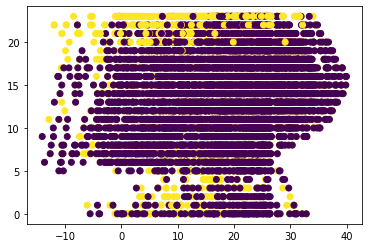

In [97]:
fig, ax = plt.subplots()
ax.scatter(X['atemperature'], X['hour_local'], c=y)

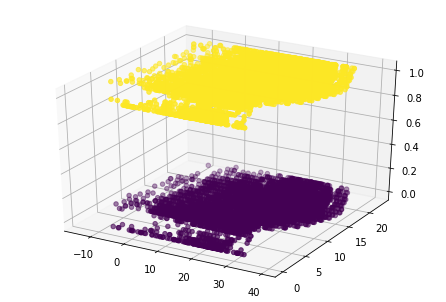

In [98]:
fig = plt.figure()

ax = Axes3D(fig)

ax.scatter(X['atemperature'], X['hour_local'], y, c=y, marker='o')
plt.show()

In [99]:
clf = RandomForestClassifier(n_estimators=7)
clf.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

## Linear Regression 

In [105]:
result7

atemperature  count_end  count_start        datetimelocal  hour_local  \
0             5.62        0.0        120.0  2017-01-01 00:00:00         0.0   
1             3.42        0.0         48.0  2017-01-01 08:00:00         8.0   
2             7.36        0.0         56.0  2017-01-01 10:00:00        10.0   
3             9.20        0.0        182.0  2017-01-01 11:00:00        11.0   
4            10.78        0.0         12.0  2017-01-01 12:00:00        12.0   
...            ...        ...          ...                  ...         ...   
5890        -12.10       14.0          0.0  2017-12-31 10:00:00        10.0   
5891        -11.12       26.0          0.0  2017-12-31 11:00:00        11.0   
5892        -10.60        9.0          0.0  2017-12-31 15:00:00        15.0   
5893        -11.31        8.0          0.0  2017-12-31 16:00:00        16.0   
5894        -10.24       21.0          0.0  2017-12-31 17:00:00        17.0   

      humidity  temperature  windSpeed  count_end_minus_start  defizit  \
0         0.40         7.32       9.12                 -120.0   -120.0   
1         0.62         3.42       0.70                  -48.0    -48.0   
2         0.53         7.36       1.05                  -56.0    -56.0   
3         0.50         9.20       2.72                 -182.0   -182.0   
4         0.47        10.78       6.02                  -12.0    -12.0   
...        ...          ...        ...                    ...      ...   
5890      0.48        -7.46       9.69                   14.0     14.0   
5891      0.44        -7.01       8.45                   26.0     26.0   
5892      0.47        -6.59       8.39                    9.0      9.0   
5893      0.54        -7.08       8.71                    8.0      8.0   
5894      0.55        -7.33       5.61                   21.0     21.0   

      defizit_norm  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
...            ...  
5890           0.0  
5891           0.0  
5892           0.0  
5893           0.0  
5894           0.0  

[11688 rows x 11 columns]

In [155]:
x = result7[['temperature', 'humidity']] # 'datetimelocal' 'hour_local'
y = result7[['defizit']]
xneu=x.reset_index
yneu=y.set_index('defizit')

In [156]:
z = result7['defizit_norm']

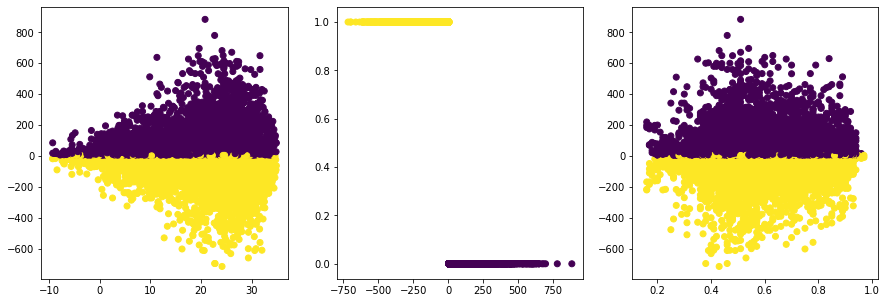

In [157]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
(ax1, ax2, ax3)=ax
ax1.scatter(x['temperature'], y, c=z)
ax2.scatter(y, z, c=z)
#ax3.scatter(y, z, c=z)
ax3.scatter(x['humidity'], y, c=z)

In [158]:
xarray = x.to_numpy()
yarray = y.to_numpy()

In [159]:
best_mse = np.Inf
best_a, best_b = None, None
for i in range(1000):
    a = np.random.random()*10
    b = np.random.random()*10
    ycalc= a*xarray +b
    mse = np.sum((ycalc-yarray)**2)/ycalc.shape[0]
    if mse <= best_mse:
        best_mse= mse
        best_a = a
        best_b = b

In [160]:
ycalc = best_a*x +best_b

In [161]:
best_a

0.07693402989350395

In [162]:
best_b

2.6853141881308384

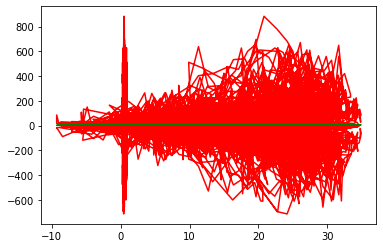

In [163]:
plt.plot(x, y, 'r-')
#plt.plot(xarray, yarray, 'bo')
plt.plot(xarray,ycalc, 'g-')

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [165]:
best_mse

31650.624693482736

In [166]:
ycalc
#mean_squared_error(yarray, ycalc)
#xtrain=x.reshape(-1,1)

temperature  humidity
0        3.248471  2.716088
1        2.948429  2.733013
2        3.251549  2.726089
3        3.393107  2.723781
4        3.514663  2.721473
...           ...       ...
5890     2.111386  2.722243
5891     2.146007  2.719165
5892     2.178319  2.721473
5893     2.140621  2.726859
5894     2.121388  2.727628

[11688 rows x 2 columns]

In [167]:
m = LinearRegression()

In [168]:
m.fit(xarray, yarray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
m.score(xarray, yarray)

0.00012827477256738273

In [170]:
xarray

array([[ 7.32,  0.4 ],
       [ 3.42,  0.62],
       [ 7.36,  0.53],
       ...,
       [-6.59,  0.47],
       [-7.08,  0.54],
       [-7.33,  0.55]])

In [171]:
y_pred = m.predict

In [172]:
y_pred

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [173]:
mcal = m.coef_, m.intercept_
mcal

(array([[-0.0290912 ,  7.89104456]]), array([-2.42508939]))

In [174]:
mcal2 = mcal[0]

In [175]:
mcal2

array([[-0.0290912 ,  7.89104456]])

In [176]:
acal = mcal2[0]
acal

array([-0.0290912 ,  7.89104456])

In [177]:
bcal = mcal[1]

In [178]:
bcal

array([-2.42508939])

In [179]:
z=20

In [180]:
ycal= acal*xarray+bcal

In [181]:
ycal =pd.DataFrame(ycal)

In [184]:
ycal.tail(100)

0         1
11588 -2.617091  0.652418
11589 -2.638619  0.494597
11590 -2.646182  0.494597
11591 -2.647637  0.415687
11592 -2.608364  0.652418
...         ...       ...
11683 -2.208069  1.362612
11684 -2.221160  1.046970
11685 -2.233378  1.283702
11686 -2.219124  1.836075
11687 -2.211851  1.914985

[100 rows x 2 columns]

In [192]:
result7

atemperature  count_end  count_start        datetimelocal  hour_local  \
0             5.62        0.0        120.0  2017-01-01 00:00:00         0.0   
1             3.42        0.0         48.0  2017-01-01 08:00:00         8.0   
2             7.36        0.0         56.0  2017-01-01 10:00:00        10.0   
3             9.20        0.0        182.0  2017-01-01 11:00:00        11.0   
4            10.78        0.0         12.0  2017-01-01 12:00:00        12.0   
...            ...        ...          ...                  ...         ...   
5890        -12.10       14.0          0.0  2017-12-31 10:00:00        10.0   
5891        -11.12       26.0          0.0  2017-12-31 11:00:00        11.0   
5892        -10.60        9.0          0.0  2017-12-31 15:00:00        15.0   
5893        -11.31        8.0          0.0  2017-12-31 16:00:00        16.0   
5894        -10.24       21.0          0.0  2017-12-31 17:00:00        17.0   

      humidity  temperature  windSpeed  count_end_minus_start  defizit  \
0         0.40         7.32       9.12                 -120.0   -120.0   
1         0.62         3.42       0.70                  -48.0    -48.0   
2         0.53         7.36       1.05                  -56.0    -56.0   
3         0.50         9.20       2.72                 -182.0   -182.0   
4         0.47        10.78       6.02                  -12.0    -12.0   
...        ...          ...        ...                    ...      ...   
5890      0.48        -7.46       9.69                   14.0     14.0   
5891      0.44        -7.01       8.45                   26.0     26.0   
5892      0.47        -6.59       8.39                    9.0      9.0   
5893      0.54        -7.08       8.71                    8.0      8.0   
5894      0.55        -7.33       5.61                   21.0     21.0   

      defizit_norm  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
...            ...  
5890           0.0  
5891           0.0  
5892           0.0  
5893           0.0  
5894           0.0  

[11688 rows x 11 columns]

In [193]:
x = result7[['temperature', 'humidity']] # 'datetimelocal' 'hour_local'
y = result7[['count_start']]
xneu=x.reset_index
yneu=y.set_index('count_start')

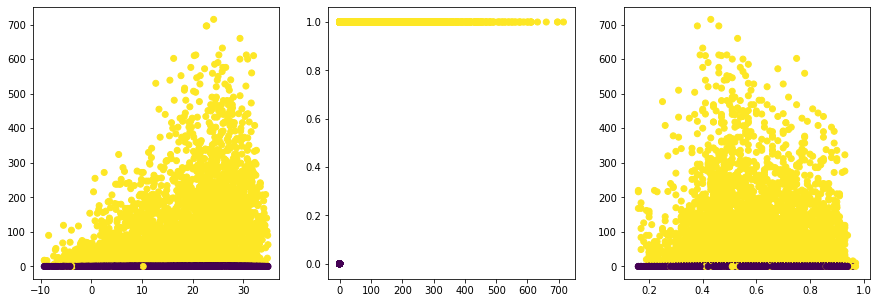

In [195]:
z = result7['defizit_norm']
fig, ax = plt.subplots(1,3, figsize=(15, 5))
(ax1, ax2, ax3)=ax
ax1.scatter(x['temperature'], y, c=z)
ax2.scatter(y, z, c=z)
#ax3.scatter(y, z, c=z)
ax3.scatter(x['humidity'], y, c=z)

In [198]:
result8=result7

In [199]:
result8.datetimelocal=pd.to_datetime(result8.datetimelocal)

In [231]:
datetime_seconds=pd.DatetimeIndex(result8.datetimelocal).asi8

In [232]:
datetime_seconds

array([1483228800000000000, 1483257600000000000, 1483264800000000000, ...,
       1514732400000000000, 1514736000000000000, 1514739600000000000],
      dtype=int64)

In [233]:
datetime_seconds = pd.DataFrame(datetime_seconds)  

In [234]:
datetime_seconds

0
0      1483228800000000000
1      1483257600000000000
2      1483264800000000000
3      1483268400000000000
4      1483272000000000000
...                    ...
11683  1514714400000000000
11684  1514718000000000000
11685  1514732400000000000
11686  1514736000000000000
11687  1514739600000000000

[11688 rows x 1 columns]

In [236]:
datetime_seconds.rename(columns = {0:'datetime_seconds'}, inplace = True)

In [237]:
datetime_seconds

datetime_seconds
0      1483228800000000000
1      1483257600000000000
2      1483264800000000000
3      1483268400000000000
4      1483272000000000000
...                    ...
11683  1514714400000000000
11684  1514718000000000000
11685  1514732400000000000
11686  1514736000000000000
11687  1514739600000000000

[11688 rows x 1 columns]

In [238]:
result8['datetimeseconds']= datetime_seconds['datetime_seconds']

In [239]:
result8

atemperature  count_end  count_start       datetimelocal  hour_local  \
0             5.62        0.0        120.0 2017-01-01 00:00:00         0.0   
1             3.42        0.0         48.0 2017-01-01 08:00:00         8.0   
2             7.36        0.0         56.0 2017-01-01 10:00:00        10.0   
3             9.20        0.0        182.0 2017-01-01 11:00:00        11.0   
4            10.78        0.0         12.0 2017-01-01 12:00:00        12.0   
...            ...        ...          ...                 ...         ...   
5890        -12.10       14.0          0.0 2017-12-31 10:00:00        10.0   
5891        -11.12       26.0          0.0 2017-12-31 11:00:00        11.0   
5892        -10.60        9.0          0.0 2017-12-31 15:00:00        15.0   
5893        -11.31        8.0          0.0 2017-12-31 16:00:00        16.0   
5894        -10.24       21.0          0.0 2017-12-31 17:00:00        17.0   

      humidity  temperature  windSpeed  count_end_minus_start  defizit  \
0         0.40         7.32       9.12                 -120.0   -120.0   
1         0.62         3.42       0.70                  -48.0    -48.0   
2         0.53         7.36       1.05                  -56.0    -56.0   
3         0.50         9.20       2.72                 -182.0   -182.0   
4         0.47        10.78       6.02                  -12.0    -12.0   
...        ...          ...        ...                    ...      ...   
5890      0.48        -7.46       9.69                   14.0     14.0   
5891      0.44        -7.01       8.45                   26.0     26.0   
5892      0.47        -6.59       8.39                    9.0      9.0   
5893      0.54        -7.08       8.71                    8.0      8.0   
5894      0.55        -7.33       5.61                   21.0     21.0   

      defizit_norm      datetimeseconds  
0              1.0  1483228800000000000  
1              1.0  1483257600000000000  
2              1.0  1483264800000000000  
3              1.0  1483268400000000000  
4              1.0  1483272000000000000  
...            ...                  ...  
5890           0.0  1484208000000000000  
5891           0.0  1484211600000000000  
5892           0.0  1484215200000000000  
5893           0.0  1484218800000000000  
5894           0.0  1484222400000000000  

[11688 rows x 12 columns]

In [240]:
result8['datetimeseconds'] -= 1483228800000000000

In [241]:
result8

atemperature  count_end  count_start       datetimelocal  hour_local  \
0             5.62        0.0        120.0 2017-01-01 00:00:00         0.0   
1             3.42        0.0         48.0 2017-01-01 08:00:00         8.0   
2             7.36        0.0         56.0 2017-01-01 10:00:00        10.0   
3             9.20        0.0        182.0 2017-01-01 11:00:00        11.0   
4            10.78        0.0         12.0 2017-01-01 12:00:00        12.0   
...            ...        ...          ...                 ...         ...   
5890        -12.10       14.0          0.0 2017-12-31 10:00:00        10.0   
5891        -11.12       26.0          0.0 2017-12-31 11:00:00        11.0   
5892        -10.60        9.0          0.0 2017-12-31 15:00:00        15.0   
5893        -11.31        8.0          0.0 2017-12-31 16:00:00        16.0   
5894        -10.24       21.0          0.0 2017-12-31 17:00:00        17.0   

      humidity  temperature  windSpeed  count_end_minus_start  defizit  \
0         0.40         7.32       9.12                 -120.0   -120.0   
1         0.62         3.42       0.70                  -48.0    -48.0   
2         0.53         7.36       1.05                  -56.0    -56.0   
3         0.50         9.20       2.72                 -182.0   -182.0   
4         0.47        10.78       6.02                  -12.0    -12.0   
...        ...          ...        ...                    ...      ...   
5890      0.48        -7.46       9.69                   14.0     14.0   
5891      0.44        -7.01       8.45                   26.0     26.0   
5892      0.47        -6.59       8.39                    9.0      9.0   
5893      0.54        -7.08       8.71                    8.0      8.0   
5894      0.55        -7.33       5.61                   21.0     21.0   

      defizit_norm  datetimeseconds  
0              1.0                0  
1              1.0   28800000000000  
2              1.0   36000000000000  
3              1.0   39600000000000  
4              1.0   43200000000000  
...            ...              ...  
5890           0.0  979200000000000  
5891           0.0  982800000000000  
5892           0.0  986400000000000  
5893           0.0  990000000000000  
5894           0.0  993600000000000  

[11688 rows x 12 columns]

In [260]:
x = result8[['datetimeseconds','temperature', 'humidity']] # 'datetimelocal' 'hour_local'
y = result8[['defizit_norm']]
xneu=x.set_index('datetimeseconds')
yneu=y.set_index('defizit_norm')

In [261]:
z = result8['defizit_norm']

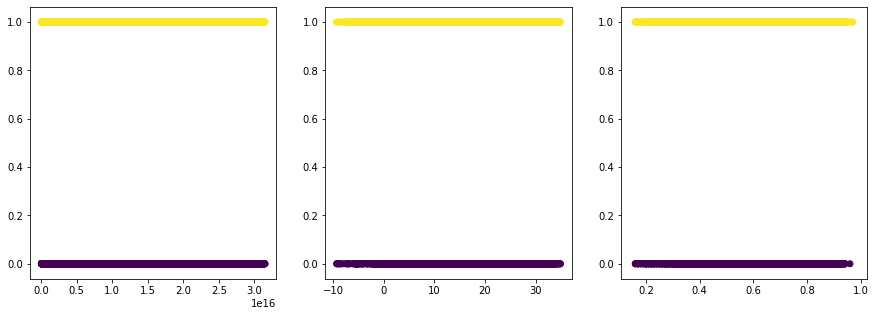

In [262]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
(ax1, ax2, ax3)=ax
ax1.scatter(x['datetimeseconds'], y, c=z)
ax2.scatter(x['temperature'], y, c=z)
#ax3.scatter(y, z, c=z)
ax3.scatter(x['humidity'], y, c=z)

In [263]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [264]:
m = LinearRegression()

In [265]:
xarray = x.to_numpy()
yarray = y.to_numpy()

In [266]:
m.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [267]:
m.score(x_train, y_train)

0.0004595886847098551

In [268]:
m.score(x_test, y_test)

-0.003588175390145443

In [269]:
m.fit(xarray, yarray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [270]:
m.score(xarray, yarray)

0.0005070497379012773

In [254]:
y_pred = m.predict

In [255]:
y_pred

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [271]:
pd.set_option('display.max_rows', None)
result8

atemperature  count_end  count_start       datetimelocal  hour_local  \
0             5.62        0.0        120.0 2017-01-01 00:00:00         0.0   
1             3.42        0.0         48.0 2017-01-01 08:00:00         8.0   
2             7.36        0.0         56.0 2017-01-01 10:00:00        10.0   
3             9.20        0.0        182.0 2017-01-01 11:00:00        11.0   
4            10.78        0.0         12.0 2017-01-01 12:00:00        12.0   
5            11.51        0.0        165.0 2017-01-01 13:00:00        13.0   
6            11.78        0.0        190.0 2017-01-01 14:00:00        14.0   
7            11.84        0.0        207.0 2017-01-01 15:00:00        15.0   
8            11.60        0.0        184.0 2017-01-01 16:00:00        16.0   
9             9.97        0.0         70.0 2017-01-01 17:00:00        17.0   
10            8.05        0.0         18.0 2017-01-01 18:00:00        18.0   
11            6.85        0.0         10.0 2017-01-01 19:00:00        19.0   
12            7.08        0.0         69.0 2017-01-02 01:00:00         1.0   
13            4.86        0.0         16.0 2017-01-02 08:00:00         8.0   
14            6.35        0.0         36.0 2017-01-02 12:00:00        12.0   
15            5.65        0.0         11.0 2017-01-02 13:00:00        13.0   
16            6.37        0.0          9.0 2017-01-02 15:00:00        15.0   
17            6.36        0.0         14.0 2017-01-02 17:00:00        17.0   
18            6.48        0.0         48.0 2017-01-03 12:00:00        12.0   
19            7.04        0.0         20.0 2017-01-03 14:00:00        14.0   
20            6.96        0.0         64.0 2017-01-03 16:00:00        16.0   
21            7.03        0.0         42.0 2017-01-03 17:00:00        17.0   
22            6.86        0.0          6.0 2017-01-03 18:00:00        18.0   
23            7.03        0.0          2.0 2017-01-03 23:00:00        23.0   
24            7.63        0.0         18.0 2017-01-04 06:00:00         6.0   
25            7.08        0.0        119.0 2017-01-04 07:00:00         7.0   
26            6.49        0.0         16.0 2017-01-04 08:00:00         8.0   
27            7.62        0.0         15.0 2017-01-04 09:00:00         9.0   
28           10.97        0.0         60.0 2017-01-04 12:00:00        12.0   
29           12.16        0.0        132.0 2017-01-04 13:00:00        13.0   
30           12.50        0.0         90.0 2017-01-04 14:00:00        14.0   
31           11.67        0.0         45.0 2017-01-04 15:00:00        15.0   
32           10.66        0.0          8.0 2017-01-04 16:00:00        16.0   
33            6.94        0.0         63.0 2017-01-04 17:00:00        17.0   
34            5.67        0.0         36.0 2017-01-04 18:00:00        18.0   
35            3.53        0.0          5.0 2017-01-04 19:00:00        19.0   
36            1.45        0.0          9.0 2017-01-04 21:00:00        21.0   
37           -0.12        0.0          1.0 2017-01-04 23:00:00        23.0   
38           -0.81        0.0         68.0 2017-01-05 07:00:00         7.0   
39           -3.08        0.0         16.0 2017-01-05 08:00:00         8.0   
40            0.03        0.0         28.0 2017-01-05 10:00:00        10.0   
41            0.57        0.0         26.0 2017-01-05 11:00:00        11.0   
42            1.72        0.0         33.0 2017-01-05 13:00:00        13.0   
43            1.71        0.0         20.0 2017-01-05 14:00:00        14.0   
44           -0.56        0.0         54.0 2017-01-05 15:00:00        15.0   
45            0.72        0.0         24.0 2017-01-05 16:00:00        16.0   
46            0.89        0.0         14.0 2017-01-05 17:00:00        17.0   
47            1.26        0.0         24.0 2017-01-05 18:00:00        18.0   
48            1.40        0.0          4.0 2017-01-05 20:00:00        20.0   
49           -3.16        0.0         68.0 2017-01-06 07:00:00         7.0   
50           -3.44        0.

In [292]:
x = result8[['datetimeseconds']] #,'temperature', 'humidity' 'datetimelocal' 'hour_local'
y = result8[['count_start']]
xneu=x.set_index('datetimeseconds')
yneu=y.set_index('count_start')

In [293]:
z = result8['defizit_norm']

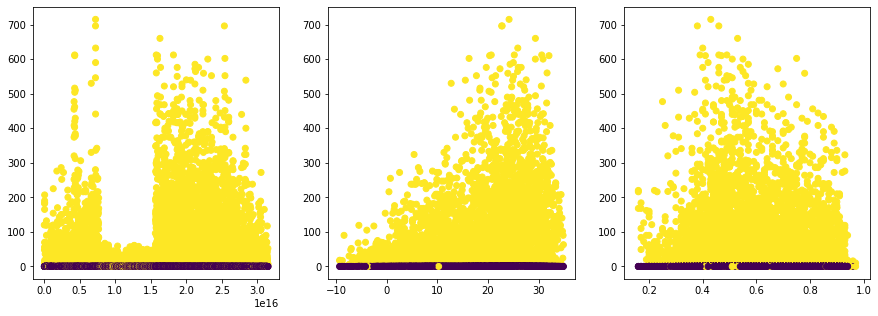

In [276]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
(ax1, ax2, ax3)=ax
ax1.scatter(x['datetimeseconds'], y, c=z)
ax2.scatter(x['temperature'], y, c=z)
#ax3.scatter(y, z, c=z)
ax3.scatter(x['humidity'], y, c=z)

In [294]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [295]:
m = LinearRegression()

In [296]:
m.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [297]:
m.score(x_train, y_train)

0.01685578553895206

In [298]:
from sklearn.preprocessing import PolynomialFeatures

In [309]:
polynomial_features = PolynomialFeatures(degree=10, include_bias=0.6)
features = polynomial_features.fit_transform(x_train)

In [310]:
from sklearn.pipeline import Pipeline, make_pipeline

In [311]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=10),
    LinearRegression()
)

In [312]:
pipeline.fit(x_test, y_test)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [313]:
pipeline.score(x_test, y_test)

0.0006918362437789982